# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [3]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


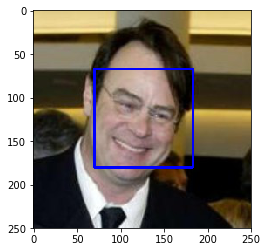

In [4]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [5]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [6]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_found_in_human = 0
len_human_files = len(human_files_short)

for i in human_files_short:
    if face_detector(i):
        human_found_in_human += 1
        
percent_human_found_in_human= (human_found_in_human / len_human_files)*100

print(f'The percentage of the first 100 images in human_files that have a detected human face is: {percent_human_found_in_human}%')


human_found_in_dog = 0
len_dog_files = len(dog_files_short)

for i in dog_files_short:
    if face_detector(i):
        human_found_in_dog += 1
        
percent_human_found_in_dog = (human_found_in_dog / len_dog_files)*100

print(f'The percentage of the first 100 images in dog_files that have a detected human face is: {percent_human_found_in_dog}%')


The percentage of the first 100 images in human_files that have a detected human face is: 98.0%
The percentage of the first 100 images in dog_files that have a detected human face is: 17.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

front_face_cascade = cv2.CascadeClassifier('')

def front_face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = front_face_cascade.detectMultiScale(gray, 1.1, 4)
    return len(faces) > 0

human_true = 0
len_human_files = len(human_files_short)

for i in human_files_short:
    if front_face_detector(i):
        human_true += 1
        
percent_human_found = (human_true / len_human_files)* 100

print(f'The percentage of the first 100 images in human_files that have a detected human face is: {percent_human_found}%')


human_true = 0
len_dog_files = len(dog_files_short)

for i in dog_files_short:
    if front_face_detector(i):
        human_true += 1
        
percent_dog_found = (human_true / len_dog_files)* 100

print(f'The percentage of the first 100 images in dog_files that have a detected human face is: {percent_dog_found}%')


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 98264237.36it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path)
    min_size = 256
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    
    transform = transforms.Compose([transforms.Resize(min_size),
                                        transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])
    tensor_img = transform(img)
    tensor_img.unsqueeze_(0)
    
    if use_cuda:
        tensor_img = tensor_img.cuda()
        
    img_output = VGG16(tensor_img)
    
    if use_cuda:
        img_output = img_output.to('cpu')
    
    predict_index = img_output.data.numpy().argmax()
    
    return predict_index # predicted class index

In [7]:
dog_files_short[99]

'/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04173.jpg'

In [8]:
VGG16_predict(dog_files_short[99])

236

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predicted_index = VGG16_predict(img_path)
    
    if (151 <= predicted_index <= 268):
        return True
    else:
        return False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_found_in_human = 0
len_human_files = len(human_files_short)

for i in human_files_short:
    if dog_detector(i):
        dog_found_in_human += 1
        
percent_dog_found_in_human = (dog_found_in_human / len_human_files) * 100

print(f'The percentage of the images in human_files_short that have a detected dog is: {percent_dog_found_in_human}%')

dog_found_in_dog = 0
len_dog_files = len(dog_files_short)

for i in dog_files_short:
    if dog_detector(i):
        dog_found_in_dog += 1
        
percent_dog_found_in_dog = (dog_found_in_dog / len_dog_files) * 100

print(f'The percentage of the images in dog_files_short that have a detected dog is: {percent_dog_found_in_dog}%')


The percentage of the images in human_files_short that have a detected dog is: 1.0%
The percentage of the images in dog_files_short that have a detected dog is: 100.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [24]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

import torch
import torchvision.models as models

# define VGG16 model
resnet50 = models.resnet50(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    resnet50 = resnet50.cuda()


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 48657570.55it/s]


In [35]:
def resnet50_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path)
    min_size = 256
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    
    transform = transforms.Compose([transforms.Resize(min_size),
                                        transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])
    tensor_img = transform(img)
    tensor_img.unsqueeze_(0)
    
    if use_cuda:
        tensor_img = tensor_img.cuda()
        
    img_output = resnet50(tensor_img)
    
    if use_cuda:
        img_output = img_output.to('cpu')
    
    predict_index = img_output.data.numpy().argmax()
    
    return predict_index # predicted class index



In [36]:
resnet50_predict(dog_files_short[99])

852

In [37]:
def resnet50_dog_detector(img_path):
    ## TODO: Complete the function.
    predicted_index = resnet50_predict(img_path)
    
    if (151 <= predicted_index <= 268):
        return True
    else:
        return False # true/false

In [38]:
dog_found_in_human = 0
len_human_files = len(human_files_short)

for i in human_files_short:
    if resnet50_dog_detector(i):
        dog_found_in_human += 1
        
percent_dog_found_in_human = (dog_found_in_human / len_human_files) * 100

print(f'The percentage of the images in human_files_short that have a detected dog is: {percent_dog_found_in_human}%')

dog_found_in_dog = 0
len_dog_files = len(dog_files_short)

for i in dog_files_short:
    if resnet50_dog_detector(i):
        dog_found_in_dog += 1
        
percent_dog_found_in_dog = (dog_found_in_dog / len_dog_files) * 100

print(f'The percentage of the images in dog_files_short that have a detected dog is: {percent_dog_found_in_dog}%')


The percentage of the images in human_files_short that have a detected dog is: 0.0%
The percentage of the images in dog_files_short that have a detected dog is: 0.0%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets
from PIL import ImageFile
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

ImageFile.LOAD_TRUNCATED_IMAGES = True

batch_size = 20
num_workers = 0

min_size = 256
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
    
train_transform = transforms.Compose([transforms.Resize(min_size),
                                      transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=mean, std=std)])

    
valid_test_transform = transforms.Compose([transforms.Resize(min_size),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize(mean=mean, std=std)])

train_imgs = datasets.ImageFolder('/data/dog_images/train', transform = train_transform)
valid_imgs = datasets.ImageFolder('/data/dog_images/valid', transform = valid_test_transform)
test_imgs = datasets.ImageFolder('/data/dog_images/test', transform = valid_test_transform)

train_loader = torch.utils.data.DataLoader(train_imgs, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_imgs, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_imgs, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

loaders_scratch = {'train' : train_loader, 'valid' : valid_loader, 'test' : test_loader}

In [12]:
train_data_size = len(train_imgs)
valid_data_size = len(valid_imgs)
test_data_size = len(test_imgs)
classes = len(train_imgs.classes)

print(f'The size of the training data is: {train_data_size}')
print(f'The size of the validation data is: {valid_data_size}')
print(f'The size of the testing data is: {test_data_size}')
print(f'The number of classes are: {classes}')

The size of the training data is: 6680
The size of the validation data is: 835
The size of the testing data is: 836
The number of classes are: 133


In [48]:
train_imgs[0]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044,

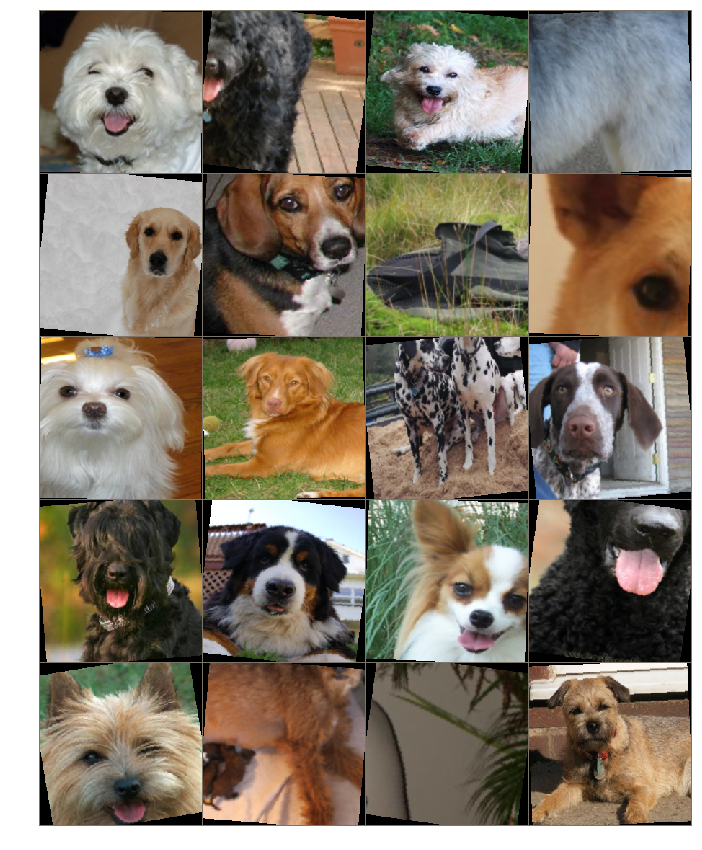

In [22]:
from torchvision import utils

inputs, _ = next(iter(data_loaders['train']))

matrix = utils.make_grid(inputs, nrow=4)
grid = matrix.numpy().transpose((1,2,0))
grid = grid*(np.array((0.229, 0.224, 0.225))) + np.array((0.485, 0.456, 0.406))
grid = np.clip(grid, 0, 1)

fig = plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(grid)
plt.show()

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: For preprocessing the data, I resized the images to 256 pixels (number found from documentation) and then cropped the image to 224 x 224 pixels. I chose these sizes because the smaller the input size, the less processing time it will take. When the input image size increases, there will also be more noise and variance which means more layers. This requires more computation resources. In order for the deep neural network to work well, the size needs to have enough pixels for the complicated task to be performed. The tensors were normalized with mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. I want all the input data to be standardized so the model can better compare the different images.

For the training data, I also used RandomResizedCrop, RandomHorizontalFlip, and RandomRotation to augment the data. These transforms will hopefully address overfitting of the data. By doing random flips and rotations, the data will have more variation in images that can be used for training purposes. The goal is to learn about the various features of each image at different postions. Thsi will increase the data volume for the model to train on.

For both the validation and testing data, I resized the images the same as the training data. I did not flip or rotate this data because it will be used for validation and to check if the model is predicitng accurately. When testing the model, there is no need to augment the image because it will be predicting from the image submitted. The model should be displaying it's prediction to the user. The training data is what the model learns from and so that data was augmented for more variation.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.cn_1 = nn.Conv2d(3, 32, 3)
#         self.cn_2 = nn.Conv2d(16, 32, 3)
#         self.cn_3 = nn.Conv2d(32, 64, 3)
        self.cn_2 = nn.Conv2d(32, 64, 3)
#         self.cn_4 = nn.Conv2d(64, 128, 3)
        self.cn_3 = nn.Conv2d(64, 128, 3)
#         self.cn_5 = nn.Conv2d(128, 256, 3)
        self.cn_4 = nn.Conv2d(128, 256, 3)
#         self.cn_6 = nn.Conv2d(256, 512, 3)
        self.cn_5 = nn.Conv2d(256, 512, 3)
#         self.cn_7 = nn.Conv2d(512, 1024, 3)
        
        self.pool = nn.MaxPool2d(2, 2)
        
#         self.fc_1 = nn.Linear(1024*7*7, 4096)
        self.fc_1 = nn.Linear(512*6*6, 1024)
#         self.fc_2 = nn.Linear(4096, 2048)
        self.fc_2 = nn.Linear(1024, 133)
        
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        
        x = F.relu(self.cn_1(x))
        x = self.pool(x)
        
        x = F.relu(self.cn_2(x))
        x = self.pool(x)

        x = F.relu(self.cn_3(x))
        x = self.pool(x)

        x = F.relu(self.cn_4(x))
        x = self.pool(x)
        
        x = F.relu(self.cn_5(x))
        x = self.pool(x)
        
#         x = F.relu(self.cn_6(x))
#         x = self.pool(x)
        
#         x = F.relu(self.cn_7(x))
#         x = self.pool(x)
        
#         x = x.view(-1, 1024*7*7)

        x = x.view(-1, 512*6*6)
        
        x = self.dropout(x)
        
#         x = self.fc_3(x)
        x = self.fc_1(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.cn_1 = nn.Conv2d(3, 16, 3)
        self.cn_2 = nn.Conv2d(16, 32, 3)
        self.cn_3 = nn.Conv2d(32, 64, 3)
        self.cn_4 = nn.Conv2d(64, 128, 3)
        self.cn_5 = nn.Conv2d(128, 256, 3)
        
        self.fc_1 = nn.Linear(256*6*6, 133)
        
        self.max_pool = nn.MaxPool2d(2, 2, ceil_mode=True)
        
        self.dropout = nn.Dropout(0.25)
        
        self.bn_1 = nn.BatchNorm2d(224,3)
        self.bn_2 = nn.BatchNorm2d(16)
        self.bn_3 = nn.BatchNorm2d(32)
        self.bn_4 = nn.BatchNorm2d(64)
        self.bn_5 = nn.BatchNorm2d(128)
        self.bn_6 = nn.BatchNorm2d(256)
        
    
    def forward(self, x):
        ## Define forward behavior
        
        x = F.relu(self.cn_1(x))
        x = self.max_pool(x)
        x = self.bn_2(x)
        
        x = F.relu(self.cn_2(x))
        x = self.max_pool(x)
        x = self.bn_3(x)
        
        x = F.relu(self.cn_3(x))
        x = self.max_pool(x)
        x = self.bn_4(x)
        
        x = F.relu(self.cn_4(x))
        x = self.max_pool(x)
        x = self.bn_5(x)
        
        x = F.relu(self.cn_5(x))
        x = self.max_pool(x)
        x = self.bn_6(x)

        x = x.view(-1, 256*6*6)
        
        x = self.dropout(x)

        x = self.fc_1(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [14]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [ ]:
### Test # 1

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            
            output = model(data)
            
            loss = criterion(output, target)
            
            loss.backward()
            
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            
            loss = criterion(output, target)
            
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        
        if valid_loss <= valid_loss_min:
            print(f'Validation loss decreased from {valid_loss_min:.6f} to {valid_loss:.6f}. -----> Saving model')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 5.356429 	Validation Loss: 4.929840
Validation loss decreased from inf to 4.929840. -----> Saving model
Epoch: 2 	Training Loss: 4.716300 	Validation Loss: 4.316865
Validation loss decreased from 4.929840 to 4.316865. -----> Saving model
Epoch: 3 	Training Loss: 4.406893 	Validation Loss: 4.121674
Validation loss decreased from 4.316865 to 4.121674. -----> Saving model
Epoch: 4 	Training Loss: 4.208176 	Validation Loss: 3.993160
Validation loss decreased from 4.121674 to 3.993160. -----> Saving model
Epoch: 5 	Training Loss: 4.092349 	Validation Loss: 3.920073
Validation loss decreased from 3.993160 to 3.920073. -----> Saving model
Epoch: 6 	Training Loss: 3.971243 	Validation Loss: 3.837511
Validation loss decreased from 3.920073 to 3.837511. -----> Saving model
Epoch: 7 	Training Loss: 3.852476 	Validation Loss: 3.660863
Validation loss decreased from 3.837511 to 3.660863. -----> Saving model
Epoch: 8 	Training Loss: 3.776088 	Validation Loss: 3.659645
Valida

In [16]:
### Test # 2

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            
            output = model(data)
            
            loss = criterion(output, target)
            
            loss.backward()
            
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            
            loss = criterion(output, target)
            
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        
        if valid_loss <= valid_loss_min:
            print(f'Validation loss decreased from {valid_loss_min:.6f} to {valid_loss:.6f}. -----> Saving model')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model


# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 5.500676 	Validation Loss: 5.060578
Validation loss decreased from inf to 5.060578. -----> Saving model
Epoch: 2 	Training Loss: 4.808869 	Validation Loss: 4.469819
Validation loss decreased from 5.060578 to 4.469819. -----> Saving model
Epoch: 3 	Training Loss: 4.419250 	Validation Loss: 4.160758
Validation loss decreased from 4.469819 to 4.160758. -----> Saving model
Epoch: 4 	Training Loss: 4.221251 	Validation Loss: 4.060396
Validation loss decreased from 4.160758 to 4.060396. -----> Saving model
Epoch: 5 	Training Loss: 4.066566 	Validation Loss: 3.905608
Validation loss decreased from 4.060396 to 3.905608. -----> Saving model
Epoch: 6 	Training Loss: 3.953003 	Validation Loss: 3.821915
Validation loss decreased from 3.905608 to 3.821915. -----> Saving model
Epoch: 7 	Training Loss: 3.846918 	Validation Loss: 3.780476
Validation loss decreased from 3.821915 to 3.780476. -----> Saving model
Epoch: 8 	Training Loss: 3.753088 	Validation Loss: 3.649011
Valida

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
### Test # 1

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.890419


Test Accuracy:  1% ( 9/836)


In [17]:
### Test # 2

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.814803


Test Accuracy: 32% (271/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [23]:
## TODO: Specify data loaders

loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.resnet50(pretrained=True)

for i in model_transfer.parameters():
    i.requires_trad = False
    
model_transfer.fc = nn.Linear(2048, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 94017704.24it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [21]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [24]:
# train the model

n_epochs = 20

model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.823439 	Validation Loss: 0.914588
Validation loss decreased from inf to 0.914588. -----> Saving model
Epoch: 2 	Training Loss: 1.551067 	Validation Loss: 0.815866
Validation loss decreased from 0.914588 to 0.815866. -----> Saving model
Epoch: 3 	Training Loss: 1.362226 	Validation Loss: 0.674996
Validation loss decreased from 0.815866 to 0.674996. -----> Saving model
Epoch: 4 	Training Loss: 1.273091 	Validation Loss: 0.614191
Validation loss decreased from 0.674996 to 0.614191. -----> Saving model
Epoch: 5 	Training Loss: 1.255842 	Validation Loss: 0.609435
Validation loss decreased from 0.614191 to 0.609435. -----> Saving model
Epoch: 6 	Training Loss: 1.209155 	Validation Loss: 0.531955
Validation loss decreased from 0.609435 to 0.531955. -----> Saving model
Epoch: 7 	Training Loss: 1.156054 	Validation Loss: 0.554579
Epoch: 8 	Training Loss: 1.141019 	Validation Loss: 0.574944
Epoch: 9 	Training Loss: 1.118556 	Validation Loss: 0.518727
Validation loss de

In [25]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [26]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.524899


Test Accuracy: 84% (708/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [38]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

from torchvision import transforms
from PIL import Image, ImageFile

ImageFile.LOAD_TRUNCATED_IMAES = True

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_imgs.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    photo = Image.open(img_path)
    
    min_size = 256
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]

    photo_transform = transforms.Compose([transforms.Resize(min_size),
                                          transforms.CenterCrop(224),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean, std)])
    
    photo_tensor = photo_transform(photo)
    
    photo_tensor = photo_tensor.unsqueeze_(0)
    
    if use_cuda:
        photo_tensor = photo_tensor.cuda()
    output = model_transfer(photo_tensor)
    
    if use_cuda:
        output = output.cpu()
    
    dog_breed_prediction = class_names[output.data.numpy().argmax()] 
    
    return dog_breed_prediction

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [31]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    photo = Image.open(img_path)
    plt.imshow(photo)
    plt.show()
    
    if dog_detector(photo) == True
        breed_prediction = predict_breed_transfer(img_path)
        print(f'This is an image of a dog. \nPredicted Breed: {breed_prediction}')
    elif face_detector(img_path) == True:
        breed_prediction = predict_breed_transfer(img_path)
        print(f'This is an image of a human. \nHuman looks most like: {breed_prediction}')
    else:
        print("This image is neither a dog or human. Please re-submit. Thank you!")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

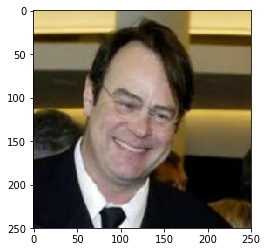

AttributeError: 'JpegImageFile' object has no attribute 'read'

In [40]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [34]:
dog_detector(dog_files_short[99])

True

In [35]:
face_detector(dog_files_short[99])

False

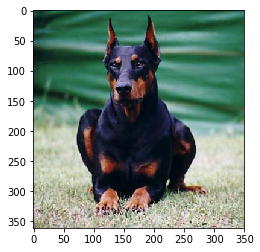

In [36]:
photo = Image.open(dog_files_short[99])
plt.imshow(photo)
plt.show()

In [39]:
predict_breed_transfer(dog_files_short[99])

'German pinscher'

In [ ]:
import math
fig = plt.figure(figsize=(30, 15))